In [3]:
# Import library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_squared_error , mean_absolute_percentage_error, r2_score , mean_absolute_error

In [4]:
df_transactions = pd.read_csv('store5.csv')
df_transactions

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [5]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           55572 non-null  int64  
 1   date         55572 non-null  object 
 2   store_nbr    55572 non-null  int64  
 3   family       55572 non-null  object 
 4   sales        55572 non-null  float64
 5   onpromotion  55572 non-null  int64  
 6   dcoilwtico   38379 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [6]:
df_transactions.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico
count,5.557200e+04,55572.0,55572.000000,55572.000000,38379.000000
mean,1.501021e+06,5.0,280.580231,2.687864,67.925589
std,8.662894e+05,0.0,652.588149,11.748996,25.666659
min,1.452000e+03,5.0,0.000000,0.000000,26.190000
25%,7.512365e+05,5.0,1.000000,0.000000,46.380000
50%,1.501021e+06,5.0,19.000000,0.000000,53.330000
75%,2.250806e+06,5.0,237.000000,0.000000,95.800000
max,3.000590e+06,5.0,8216.620000,182.000000,110.620000


In [7]:
df_transactions.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
sales              0
onpromotion        0
dcoilwtico     17193
dtype: int64

In [8]:
# Ubah tipe data date
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_transactions

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,1452,2013-01-01,5,AUTOMOTIVE,0.000,0,NaN
1,1453,2013-01-01,5,BABY CARE,0.000,0,NaN
2,1454,2013-01-01,5,BEAUTY,0.000,0,NaN
3,1455,2013-01-01,5,BEVERAGES,0.000,0,NaN
4,1456,2013-01-01,5,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
55567,3000586,2017-08-15,5,POULTRY,241.011,1,47.57
55568,3000587,2017-08-15,5,PREPARED FOODS,52.121,0,47.57
55569,3000588,2017-08-15,5,PRODUCE,1357.823,4,47.57
55570,3000589,2017-08-15,5,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.57


In [9]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           55572 non-null  int64         
 1   date         55572 non-null  datetime64[ns]
 2   store_nbr    55572 non-null  int64         
 3   family       55572 non-null  object        
 4   sales        55572 non-null  float64       
 5   onpromotion  55572 non-null  int64         
 6   dcoilwtico   38379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 3.0+ MB


array([[<Axes: title={'center': 'AUTOMOTIVE'}>,
        <Axes: title={'center': 'BABY CARE'}>,
        <Axes: title={'center': 'BEAUTY'}>,
        <Axes: title={'center': 'BEVERAGES'}>,
        <Axes: title={'center': 'BOOKS'}>,
        <Axes: title={'center': 'BREAD/BAKERY'}>],
       [<Axes: title={'center': 'CELEBRATION'}>,
        <Axes: title={'center': 'CLEANING'}>,
        <Axes: title={'center': 'DAIRY'}>,
        <Axes: title={'center': 'DELI'}>,
        <Axes: title={'center': 'EGGS'}>,
        <Axes: title={'center': 'FROZEN FOODS'}>],
       [<Axes: title={'center': 'GROCERY I'}>,
        <Axes: title={'center': 'GROCERY II'}>,
        <Axes: title={'center': 'HARDWARE'}>,
        <Axes: title={'center': 'HOME AND KITCHEN I'}>,
        <Axes: title={'center': 'HOME AND KITCHEN II'}>,
        <Axes: title={'center': 'HOME APPLIANCES'}>],
       [<Axes: title={'center': 'HOME CARE'}>,
        <Axes: title={'center': 'LADIESWEAR'}>,
        <Axes: title={'center': 'LAWN AND GA

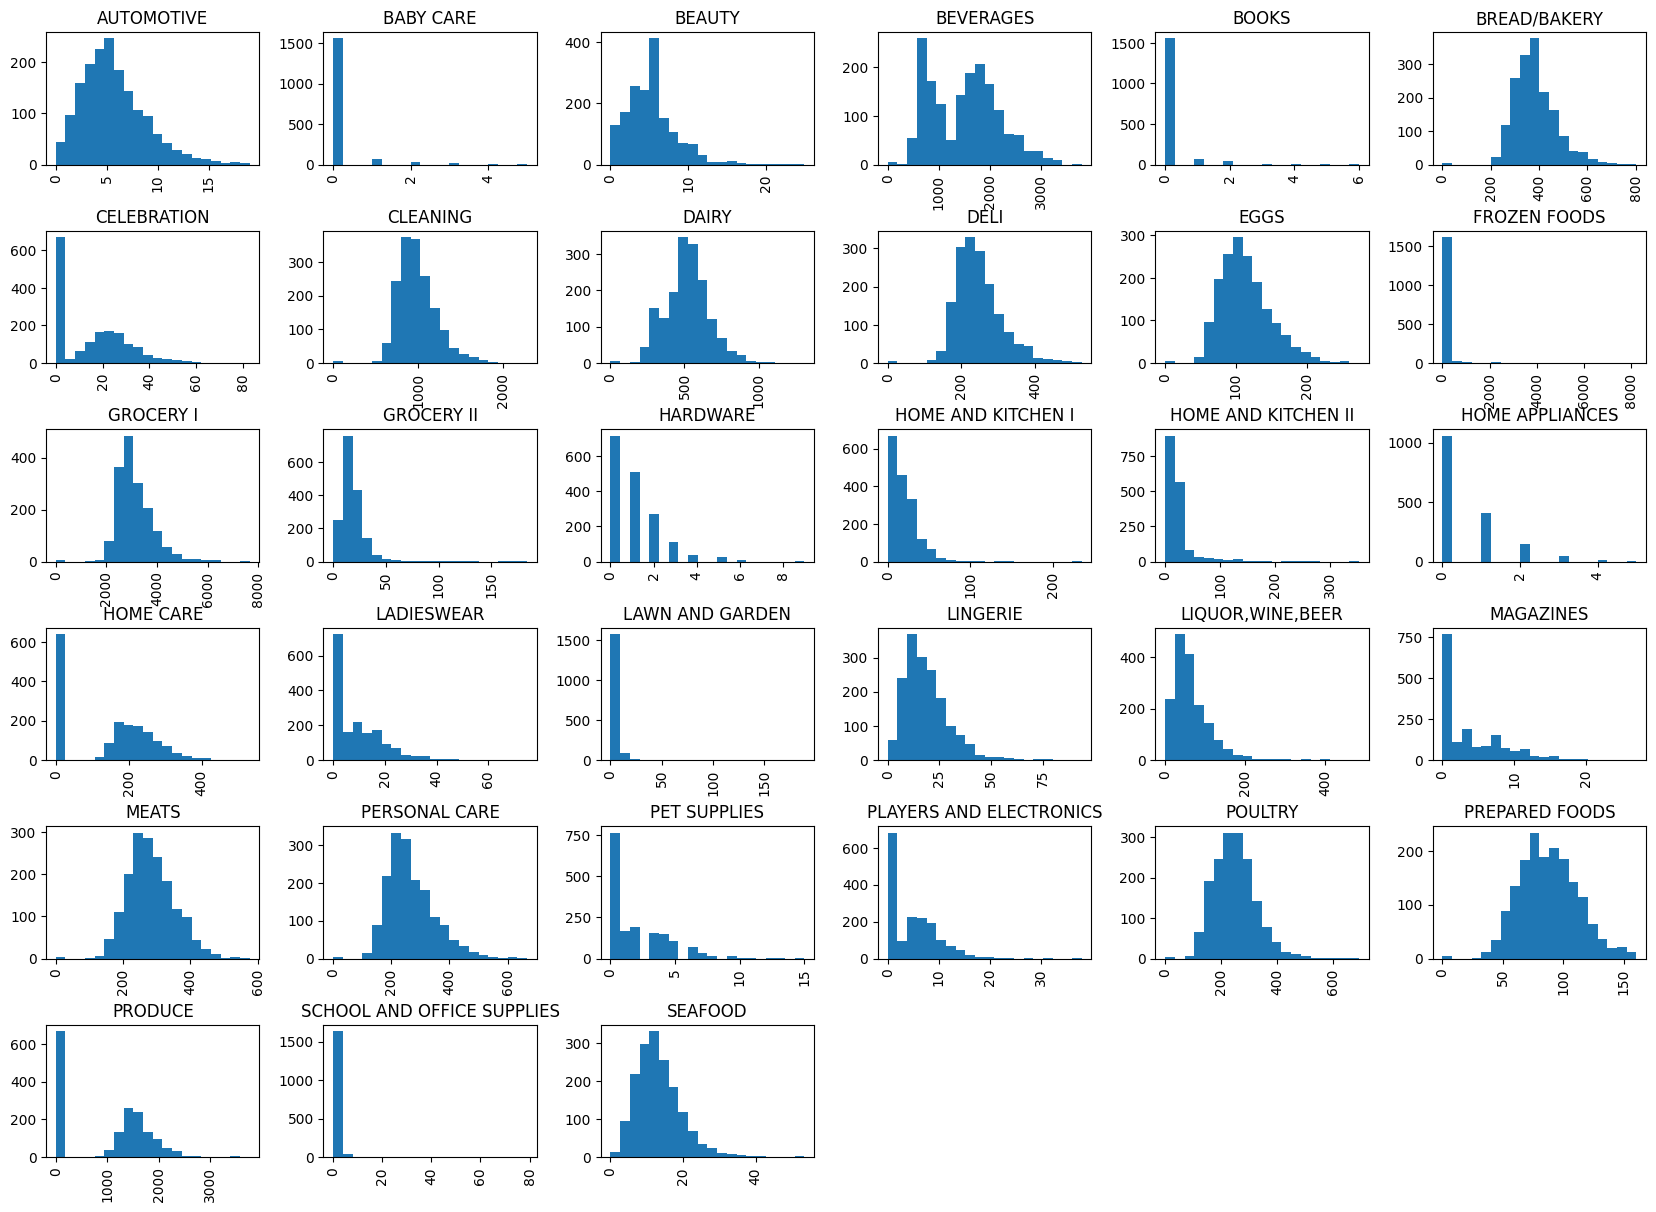

In [10]:
df_transactions.hist('sales', by='family', figsize=(20,15), bins=20)

In [11]:
sales_df = df_transactions.copy(deep=True) #membuat salinan agar dataframe asli ttp utuh
print(sales_df[sales_df.duplicated()])
sales_df['date']=pd.to_datetime(sales_df['date'])

#feature engineering (membuat fitur baru dari kolom "date")
sales_df['weekdays'] = sales_df['date'].dt.day_name() #berisi nama hari
sales_df['week_of_the_year'] = sales_df['date'].dt.isocalendar().week #berisi nomor minggu dalam setahun
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day #berisi nomor hari dalam sebulan

print(sales_df.info())
print(sales_df[sales_df.duplicated()])

Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, dcoilwtico]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55572 entries, 0 to 55571
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                55572 non-null  int64         
 1   date              55572 non-null  datetime64[ns]
 2   store_nbr         55572 non-null  int64         
 3   family            55572 non-null  object        
 4   sales             55572 non-null  float64       
 5   onpromotion       55572 non-null  int64         
 6   dcoilwtico        38379 non-null  float64       
 7   weekdays          55572 non-null  object        
 8   week_of_the_year  55572 non-null  UInt32        
 9   year              55572 non-null  int32         
 10  month             55572 non-null  int32         
 11  day               55572 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), 

In [12]:
print(sales_df.columns)

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'weekdays', 'week_of_the_year', 'year', 'month', 'day'],
      dtype='object')


In [13]:
print(sales_df['store_nbr'].unique())

[5]


In [14]:
sales_df = sales_df.drop(columns=['store_nbr'])

In [15]:
sales_df.columns

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day'],
      dtype='object')

In [16]:
total_unique_family = sales_df['family'].nunique()
print("Total unique family:", total_unique_family)
print(sales_df['family'].unique())

Total unique family: 33
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


                  sales
family                 
GROCERY I  5.262682e+06
BEVERAGES  2.533831e+06
CLEANING   1.667748e+06
PRODUCE    1.653582e+06
DAIRY      8.712830e+05


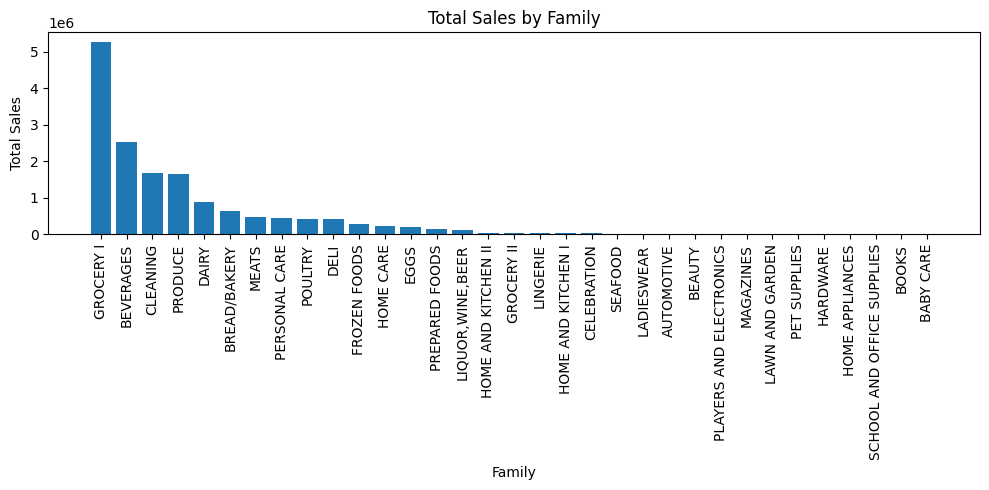

In [17]:
df = sales_df.groupby('family')[['sales']].sum()
df = df.sort_values(by='sales', ascending=False)

plt.figure(figsize=(10,5))
bars=plt.bar(df.index, df['sales'])

plt.xlabel('Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Family')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show

print(df.head())


Output berikut menunjukkan total penjualan (sales) yang dikelompokkan berdasarkan kategori produk (family). Data ini menyoroti kategori produk dengan kontribusi penjualan tertinggi:

* GROCERY I: $5.26 \times 10^6$ (sekitar 5.26 juta)
* BEVERAGES: $2.53 \times 10^6$ (sekitar 2.53 juta)
* CLEANING: $1.67 \times 10^6$ (sekitar 1.67 juta)
* PRODUCE: $1.65 \times 10^6$ (sekitar 1.65 juta)
* DAIRY: $8.71 \times 10^5$ (sekitar 871 ribu)

Kategori "GROCERY I" menunjukkan penjualan tertinggi secara signifikan, diikuti oleh "BEVERAGES". Angka penjualan direpresentasikan dalam notasi ilmiah.

In [18]:
sales_df = sales_df[sales_df['family']=='BEVERAGES']

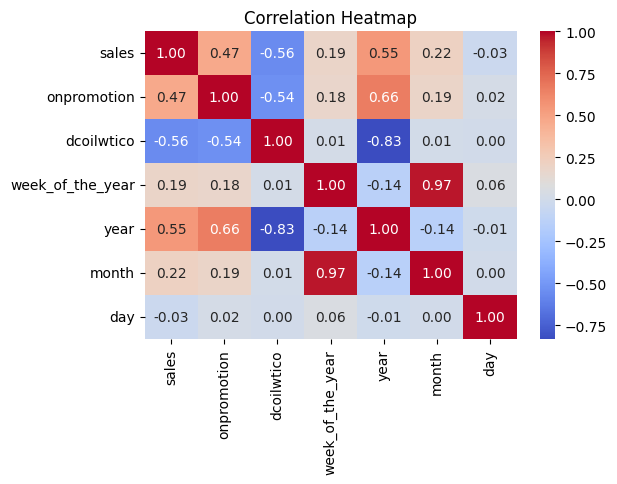

In [19]:
df = sales_df.drop(columns=['id', 'family', 'weekdays', 'date']) # Drop the 'family', 'weekdays', 'date' column
pearson_corr = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan heatmap ini:

- 'dcoilwtico' memiliki korelasi positif sedang dengan sales, dengan koefisien sebesar 0.56. Ini mengindikasikan bahwa ada kecenderungan penjualan meningkat seiring dengan kenaikan harga minyak, dan sebaliknya.
- 'onpromotion' memiliki korelasi positif sedang dengan sales, dengan koefisien sebesar 0.47. Hal ini menunjukkan bahwa peningkatan jumlah item yang dipromosikan cenderung diikuti oleh peningkatan penjualan.

## Summary of Transaction Distribution per Day of the Week

In [20]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = sales_df
temp=df.groupby('weekdays')[['date','family','sales','onpromotion','dcoilwtico']].count().reindex(weekday_order)
temp

,date,family,sales,onpromotion,dcoilwtico
weekdays,,,,,
Monday,241,241,241,241,218
Tuesday,242,242,242,242,240
Wednesday,240,240,240,240,239
Thursday,240,240,240,240,234
Friday,240,240,240,240,232
Saturday,241,241,241,241,0
Sunday,240,240,240,240,0


## Insert Missing Date

In [21]:
min_date = sales_df['date'].min()
max_date = sales_df['date'].max()
print(f'min_date: {min_date}')
print(f'max_date: {max_date}')

tanggalan = pd.date_range(start=min_date, end=max_date, freq='D')
print(tanggalan)

missing_dates = tanggalan.difference(sales_df['date'])

print()
print(f'Jumlah missing dates: {len(missing_dates)}')
print(missing_dates)

min_date: 2013-01-01 00:00:00
max_date: 2017-08-15 00:00:00
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

Jumlah missing dates: 4
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


Rentang data penjualan dalam sales_df adalah dari 1 Januari 2013 hingga 15 Agustus 2017. Setelah dilakukan pengecekan terhadap kelengkapan tanggal harian dalam rentang tersebut, ditemukan adanya 4 tanggal yang tidak memiliki catatan data penjualan. Tanggal-tanggal yang hilang tersebut adalah:

25 Desember 2013
25 Desember 2014
25 Desember 2015
25 Desember 2016
Keempat tanggal ini secara konsisten jatuh pada Hari Natal. Kosongnya data pada hari-hari tersebut sangat mungkin disebabkan oleh tutupnya operasional toko selama hari libur besar tersebut.

Untuk keperluan analisis time series lebih lanjut, terutama dengan model seperti ARIMA dan LSTM yang sensitif terhadap kontinuitas data, keberadaan tanggal-tanggal yang hilang ini perlu ditangani. Jika dibiarkan kosong, dapat mengganggu perhitungan lag, perbedaan (differencing), atau fitur berbasis waktu lainnya, serta analisis pola musiman yang akurat.

Oleh karena itu, langkah selanjutnya adalah mengisi nilai data pada keempat tanggal Hari Natal yang hilang tersebut. Pendekatan yang akan digunakan adalah dengan menduplikasi data dari hari lain yang tercatat (dalam hal ini, data dari tanggal 1 Januari 2013 akan digunakan sebagai template atau placeholder) dan menyesuaikan tanggalnya menjadi tanggal-tanggal yang hilang. Setelah proses pengisian ini, dataset akan diurutkan kembali untuk memastikan integritas kronologis data sebelum analisis lebih lanjut.

In [22]:
temp = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
temp.loc[:, 'date'] = pd.to_datetime('2013-12-25')

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
temp2.loc[:, 'date'] = pd.to_datetime('2014-12-25')

temp = pd.concat([temp, temp2])

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
temp2.loc[:, 'date'] = pd.to_datetime('2015-12-25')
temp = pd.concat([temp, temp2])

temp2 = sales_df[sales_df['date'] == pd.to_datetime('2013-01-01')]
temp2.loc[:, 'date'] = pd.to_datetime('2016-12-25')
temp = pd.concat([temp, temp2], ignore_index=True)

sales_df = pd.concat([sales_df, temp], ignore_index=True)

In [23]:
#sorting the dataframe
sales_df = sales_df.sort_values(by=['date', 'family']).reset_index(drop=True)
sales_df = sales_df.sort_values(by='date')

Missing Date Verification

In [24]:
# buat rentang tanggal ideal berdasarkan min/max di sales_df saat ini
rentang_ideal_setelah_imputasi = pd.date_range(start=sales_df['date'].min(), 
                                             end=sales_df['date'].max(), 
                                             freq='D')

# cari tanggal yang hilang dengan membandingkan rentang ideal dengan tanggal unik di sales_df
tanggal_masih_hilang = rentang_ideal_setelah_imputasi.difference(sales_df['date'].unique())

# tampilkan hasilnya
print(f"Jumlah tanggal yang masih hilang: {len(tanggal_masih_hilang)}")
if len(tanggal_masih_hilang) > 0:
    print("Tanggal yang masih hilang adalah:")
    print(tanggal_masih_hilang)
else:
    print("Tidak ada lagi tanggal yang hilang. Semua tanggal dalam rentang telah terisi.")

Jumlah tanggal yang masih hilang: 0
Tidak ada lagi tanggal yang hilang. Semua tanggal dalam rentang telah terisi.


## Creating Dummy Variable

In [25]:
sales_df['weekdays'] = sales_df['date'].dt.day_name()
sales_df['week_of_the_year'] = sales_df['date'].dt.isocalendar().week
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day

Analisis Data pada Hari Tahun Baru

In [26]:
df = sales_df[(sales_df['month']==1) & (sales_df['day']==1)]
print(df)

           id       date     family  sales  onpromotion  dcoilwtico  \
0        1455 2013-01-01  BEVERAGES    0.0            0         NaN   
365    650103 2014-01-01  BEVERAGES    0.0            0         NaN   
730   1298751 2015-01-01  BEVERAGES    0.0            0         NaN   
1095  1947399 2016-01-01  BEVERAGES    0.0            0         NaN   
1461  2597829 2017-01-01  BEVERAGES    0.0            0         NaN   

       weekdays  week_of_the_year  year  month  day  
0       Tuesday                 1  2013      1    1  
365   Wednesday                 1  2014      1    1  
730    Thursday                 1  2015      1    1  
1095     Friday                53  2016      1    1  
1461     Sunday                52  2017      1    1  


Analisis Data pada Hari Natal

In [27]:
df = sales_df[(sales_df['month']==12) & (sales_df['day']==25)]
print(df)

        id       date     family  sales  onpromotion  dcoilwtico   weekdays  \
358   1455 2013-12-25  BEVERAGES    0.0            0         NaN  Wednesday   
723   1455 2014-12-25  BEVERAGES    0.0            0         NaN   Thursday   
1088  1455 2015-12-25  BEVERAGES    0.0            0         NaN     Friday   
1454  1455 2016-12-25  BEVERAGES    0.0            0         NaN     Sunday   

      week_of_the_year  year  month  day  
358                 52  2013     12   25  
723                 52  2014     12   25  
1088                52  2015     12   25  
1454                51  2016     12   25  


Analisis Data pada Hari Akhir Tahun

In [28]:
df = sales_df[(sales_df['month']==12) & (sales_df['day']==31)]
print(df)
#libur akhir tahun

           id       date     family   sales  onpromotion  dcoilwtico  \
364    648321 2013-12-31  BEVERAGES  1268.0            0       98.17   
729   1296969 2014-12-31  BEVERAGES  3298.0            4       53.45   
1094  1945617 2015-12-31  BEVERAGES  2672.0           22       37.13   
1460  2596047 2016-12-31  BEVERAGES  2985.0           70         NaN   

       weekdays  week_of_the_year  year  month  day  
364     Tuesday                 1  2013     12   31  
729   Wednesday                 1  2014     12   31  
1094   Thursday                53  2015     12   31  
1460   Saturday                52  2016     12   31  


Creating Dummy Variable for Weekend and Holiday

In [29]:
sales_df['isWeekend'] = sales_df['weekdays'].isin(['Saturday', 'Sunday']).astype(int)
sales_df['isHoliday'] = ((sales_df['month'] == 12) & (sales_df['day'] == 25)) | ((sales_df['month'] == 12) & (sales_df['day'] == 31))
sales_df['isHoliday'] = sales_df['isHoliday'] | ((sales_df['date'].dt.month == 1 & (sales_df['date'].dt.day == 1)))
sales_df['isHoliday'] = sales_df['isHoliday'].astype(int)

In [30]:
df = sales_df[(sales_df['isWeekend']==1)]
print(df)

           id       date     family   sales  onpromotion  dcoilwtico  \
4        8583 2013-01-05  BEVERAGES   912.0            0         NaN   
5       10365 2013-01-06  BEVERAGES  1124.0            0         NaN   
11      21057 2013-01-12  BEVERAGES   923.0            0         NaN   
12      22839 2013-01-13  BEVERAGES  1114.0            0         NaN   
18      33531 2013-01-19  BEVERAGES   794.0            0         NaN   
...       ...        ...        ...     ...          ...         ...   
1671  2972049 2017-07-30  BEVERAGES  2850.0           30         NaN   
1677  2982741 2017-08-05  BEVERAGES  2164.0            9         NaN   
1678  2984523 2017-08-06  BEVERAGES  2166.0           11         NaN   
1684  2995215 2017-08-12  BEVERAGES  1353.0            6         NaN   
1685  2996997 2017-08-13  BEVERAGES  1838.0            9         NaN   

      weekdays  week_of_the_year  year  month  day  isWeekend  isHoliday  
4     Saturday                 1  2013      1    5          

In [31]:
df = sales_df[(sales_df['isHoliday']==1)]
print(df)

           id       date     family   sales  onpromotion  dcoilwtico  \
0        1455 2013-01-01  BEVERAGES     0.0            0         NaN   
358      1455 2013-12-25  BEVERAGES     0.0            0         NaN   
364    648321 2013-12-31  BEVERAGES  1268.0            0       98.17   
365    650103 2014-01-01  BEVERAGES     0.0            0         NaN   
723      1455 2014-12-25  BEVERAGES     0.0            0         NaN   
729   1296969 2014-12-31  BEVERAGES  3298.0            4       53.45   
730   1298751 2015-01-01  BEVERAGES     0.0            0         NaN   
1088     1455 2015-12-25  BEVERAGES     0.0            0         NaN   
1094  1945617 2015-12-31  BEVERAGES  2672.0           22       37.13   
1095  1947399 2016-01-01  BEVERAGES     0.0            0         NaN   
1454     1455 2016-12-25  BEVERAGES     0.0            0         NaN   
1460  2596047 2016-12-31  BEVERAGES  2985.0           70         NaN   
1461  2597829 2017-01-01  BEVERAGES     0.0            0        

In [32]:
sales_df

,id,date,family,sales,onpromotion,dcoilwtico,weekdays,week_of_the_year,year,month,day,isWeekend,isHoliday
0,1455,2013-01-01,BEVERAGES,0.0,0,NaN,Tuesday,1,2013,1,1,0,1
1,3237,2013-01-02,BEVERAGES,947.0,0,93.14,Wednesday,1,2013,1,2,0,0
2,5019,2013-01-03,BEVERAGES,847.0,0,92.97,Thursday,1,2013,1,3,0,0
3,6801,2013-01-04,BEVERAGES,859.0,0,93.12,Friday,1,2013,1,4,0,0
4,8583,2013-01-05,BEVERAGES,912.0,0,NaN,Saturday,1,2013,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,2993433,2017-08-11,BEVERAGES,1717.0,11,48.81,Friday,32,2017,8,11,0,0
1684,2995215,2017-08-12,BEVERAGES,1353.0,6,NaN,Saturday,32,2017,8,12,1,0
1685,2996997,2017-08-13,BEVERAGES,1838.0,9,NaN,Sunday,32,2017,8,13,1,0
1686,2998779,2017-08-14,BEVERAGES,1771.0,10,47.59,Monday,33,2017,8,14,0,0


## Handling Missing Value

In [33]:
sales_df['oil_fill'] = sales_df['dcoilwtico']
sales_df['oil_fill'] = sales_df['oil_fill'].interpolate(method='linear')
sales_df['oil_fill'] = sales_df['oil_fill'].fillna(method='bfill')
#bfill : backward fill, artinya menarik nilai dari bawah

sales_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24236\4102830390.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_df['oil_fill'] = sales_df['oil_fill'].fillna(method='bfill')


,id,date,family,sales,onpromotion,dcoilwtico,weekdays,week_of_the_year,year,month,day,isWeekend,isHoliday,oil_fill
0,1455,2013-01-01,BEVERAGES,0.0,0,NaN,Tuesday,1,2013,1,1,0,1,93.140000
1,3237,2013-01-02,BEVERAGES,947.0,0,93.14,Wednesday,1,2013,1,2,0,0,93.140000
2,5019,2013-01-03,BEVERAGES,847.0,0,92.97,Thursday,1,2013,1,3,0,0,92.970000
3,6801,2013-01-04,BEVERAGES,859.0,0,93.12,Friday,1,2013,1,4,0,0,93.120000
4,8583,2013-01-05,BEVERAGES,912.0,0,NaN,Saturday,1,2013,1,5,1,0,93.146667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,2993433,2017-08-11,BEVERAGES,1717.0,11,48.81,Friday,32,2017,8,11,0,0,48.810000
1684,2995215,2017-08-12,BEVERAGES,1353.0,6,NaN,Saturday,32,2017,8,12,1,0,48.403333
1685,2996997,2017-08-13,BEVERAGES,1838.0,9,NaN,Sunday,32,2017,8,13,1,0,47.996667
1686,2998779,2017-08-14,BEVERAGES,1771.0,10,47.59,Monday,33,2017,8,14,0,0,47.590000


##Correlation Check

In [34]:
correlation_onpromotion = sales_df[['sales', 'onpromotion']].corr()
print(f'correlation_onpromotion:\n{correlation_onpromotion}')

correlation_oil = sales_df[['sales', 'oil_fill']].corr()
print(f'correlation_oil:\n{correlation_oil}')

correlation_onpromotion:
                sales  onpromotion
sales        1.000000     0.467944
onpromotion  0.467944     1.000000
correlation_oil:
             sales  oil_fill
sales     1.000000 -0.498858
oil_fill -0.498858  1.000000


In [35]:
# Memilih subset kolom
df_subset_for_corr = sales_df[['sales', 'onpromotion', 'oil_fill', 'isHoliday', 'isWeekend']]

# Menghitung Korelasi Pearson
pearson_corr_matrix = df_subset_for_corr.corr(method='pearson')

# Menghitung Korelasi Spearman
spearman_corr_matrix = df_subset_for_corr.corr(method='spearman')




In [36]:

print("Pearson Correlation Matrix:\n", pearson_corr_matrix)

Pearson Correlation Matrix:
                 sales  onpromotion  oil_fill  isHoliday  isWeekend
sales        1.000000     0.467944 -0.498858  -0.093689   0.290683
onpromotion  0.467944     1.000000 -0.538569  -0.019545   0.022237
oil_fill    -0.498858    -0.538569  1.000000  -0.016723  -0.000536
isHoliday   -0.093689    -0.019545 -0.016723   1.000000  -0.010684
isWeekend    0.290683     0.022237 -0.000536  -0.010684   1.000000


Pearson Correlation Matrix artinya mengukur hubungan linear.
- sales vs onpromotion (0.467944): Ada korelasi linear positif sedang. Ini berarti ada kecenderungan bahwa ketika jumlah promosi (onpromotion) meningkat, penjualan (sales) juga meningkat secara linear, dan sebaliknya.
- sales vs oil_fill (-0.498858): Ada korelasi linear negatif sedang. Ketika harga minyak (oil_fill) naik, penjualan (sales) cenderung turun secara linear, dan sebaliknya.
- sales vs isHoliday (-0.093689): Korelasi linear negatif sangat lemah. Hampir tidak ada hubungan linear antara penjualan dan status hari libur (berdasarkan definisi isHoliday Anda). Ini masuk akal jika pada beberapa hari libur penjualan 0, dan pada hari lain biasa saja, sehingga tidak membentuk pola linear yang jelas.
- sales vs isWeekend (0.290683): Korelasi linear positif lemah hingga sedang. Penjualan cenderung sedikit lebih tinggi pada akhir pekan dibandingkan hari kerja secara linear.
- onpromotion vs oil_fill (-0.538569): Korelasi linear negatif sedang. Ketika harga minyak naik, jumlah promosi cenderung turun secara linear.

In [37]:
print("\nSpearman Correlation Matrix:\n", spearman_corr_matrix)


Spearman Correlation Matrix:
                 sales  onpromotion  oil_fill  isHoliday  isWeekend
sales        1.000000     0.665324 -0.472720  -0.074091   0.298973
onpromotion  0.665324     1.000000 -0.716599  -0.057457   0.014160
oil_fill    -0.472720    -0.716599  1.000000  -0.006064  -0.000751
isHoliday   -0.074091    -0.057457 -0.006064   1.000000  -0.010684
isWeekend    0.298973     0.014160 -0.000751  -0.010684   1.000000


Spearman Correlation Matrix artinya mengukur hubungan monotonik (apakah variabel cenderung bergerak ke arah yang sama atau berlawanan)
- sales vs onpromotion (0.665324): Korelasi monotonik positif sedang hingga kuat. Ini lebih tinggi dari Pearson. Artinya, ketika promosi naik, penjualan cenderung naik (dan sebaliknya), dan hubungan ini lebih konsisten secara monotonik daripada secara linear. Mungkin ada titik di mana peningkatan promosi besar tidak menghasilkan peningkatan penjualan yang sama besarnya (bukan garis lurus sempurna), tetapi tren umumnya tetap sama.
- sales vs oil_fill (-0.472720): Korelasi monotonik negatif sedang. Mirip dengan Pearson, menunjukkan bahwa ketika harga minyak naik, penjualan cenderung turun.
- sales vs isHoliday (-0.074091): Korelasi monotonik negatif sangat lemah. Serupa dengan Pearson.
- sales vs isWeekend (0.298973): Korelasi monotonik positif lemah hingga sedang. Serupa dengan Pearson.
- onpromotion vs oil_fill (-0.716599): Korelasi monotonik negatif kuat. Ini jauh lebih kuat daripada nilai Pearson. Ini menunjukkan bahwa ada kecenderungan yang kuat bahwa ketika harga minyak naik, jumlah promosi turun (atau sebaliknya), dan hubungan ini mungkin tidak linear tetapi sangat konsisten secara arah.


Ditarik kesimpulan bahwa :
- hubungan "onpromotion" dengan "sales" menunjukkan bahwa semakin banyak promosi, penjualan cenderung meningkat
- hubungan "oil_fill" dengan "sales" menunjukan ada hubungan negatif yang sedang antara harga minyak dan penjualan. Artinya, ketika harga minyak cenderung naik, penjualan cenderung turun, dan sebaliknya

## ADF Test

In [38]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
#import fungsi ADF
from statsmodels.tsa.stattools import adfuller

#define fungsi utk menmalankan dan memformat hasil ADF test
def adf_test(series, name):
  #menjalankan ADF test pada series dengan menghapus NaN
  result = adfuller(series.dropna())
  print(f'ADF Test on: {name}')
  print(f'Test Statistic: {result[0]:.4f}') 
  print(f'p-value: {result[1]:.4f}')
  print(f'Critical Values:', result[4])

  gc='\u2713'
  rc='\u2716'

  #logic utk menentukan stasioner berdasarkan p-value
  if result[1] <= 0.05:
    print(f'{gc} {name} is STATIONARY (Reject null hypothesis)')
  else:
    print(f'{rc} {name} is NOT STATIONARY (Fail to reject null hypothesis')
  print("-" * 50)

#run ADF Test on Sales
adf_test(sales_df['sales'], 'Sales [sales]')

#run ADF Test on OnPromotion
adf_test(sales_df['onpromotion'], 'Onpromotion [onpromotion]')



ADF Test on: Sales [sales]
Test Statistic: -3.9271
p-value: 0.0018
Critical Values: {'1%': -3.434283579780684, '5%': -2.863277451883613, '10%': -2.5676949772294817}
✓ Sales [sales] is STATIONARY (Reject null hypothesis)
--------------------------------------------------
ADF Test on: Onpromotion [onpromotion]
Test Statistic: -2.3539
p-value: 0.1552
Critical Values: {'1%': -3.4342906911169404, '5%': -2.8632805908715726, '10%': -2.5676966486957706}
✖ Onpromotion [onpromotion] is NOT STATIONARY (Fail to reject null hypothesis
--------------------------------------------------


## Preparation for Modelling

In [40]:
print(sales_df.columns)
print(sales_df.head())

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico',
       'weekdays', 'week_of_the_year', 'year', 'month', 'day', 'isWeekend',
       'isHoliday', 'oil_fill'],
      dtype='object')
     id       date     family  sales  onpromotion  dcoilwtico   weekdays  \
0  1455 2013-01-01  BEVERAGES    0.0            0         NaN    Tuesday   
1  3237 2013-01-02  BEVERAGES  947.0            0       93.14  Wednesday   
2  5019 2013-01-03  BEVERAGES  847.0            0       92.97   Thursday   
3  6801 2013-01-04  BEVERAGES  859.0            0       93.12     Friday   
4  8583 2013-01-05  BEVERAGES  912.0            0         NaN   Saturday   

   week_of_the_year  year  month  day  isWeekend  isHoliday   oil_fill  
0                 1  2013      1    1          0          1  93.140000  
1                 1  2013      1    2          0          0  93.140000  
2                 1  2013      1    3          0          0  92.970000  
3                 1  2013      1    4          0   

In [41]:
beverages = sales_df['family']=='BEVERAGES'
beverages = sales_df[beverages]
beverages = beverages.set_index('date')
beverages

,id,family,sales,onpromotion,dcoilwtico,weekdays,week_of_the_year,year,month,day,isWeekend,isHoliday,oil_fill
date,,,,,,,,,,,,,
2013-01-01,1455,BEVERAGES,0.0,0,NaN,Tuesday,1,2013,1,1,0,1,93.140000
2013-01-02,3237,BEVERAGES,947.0,0,93.14,Wednesday,1,2013,1,2,0,0,93.140000
2013-01-03,5019,BEVERAGES,847.0,0,92.97,Thursday,1,2013,1,3,0,0,92.970000
2013-01-04,6801,BEVERAGES,859.0,0,93.12,Friday,1,2013,1,4,0,0,93.120000
2013-01-05,8583,BEVERAGES,912.0,0,NaN,Saturday,1,2013,1,5,1,0,93.146667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993433,BEVERAGES,1717.0,11,48.81,Friday,32,2017,8,11,0,0,48.810000
2017-08-12,2995215,BEVERAGES,1353.0,6,NaN,Saturday,32,2017,8,12,1,0,48.403333
2017-08-13,2996997,BEVERAGES,1838.0,9,NaN,Sunday,32,2017,8,13,1,0,47.996667


Visualisasi Tren Penjualan dan Promosi untuk BEVERAGES

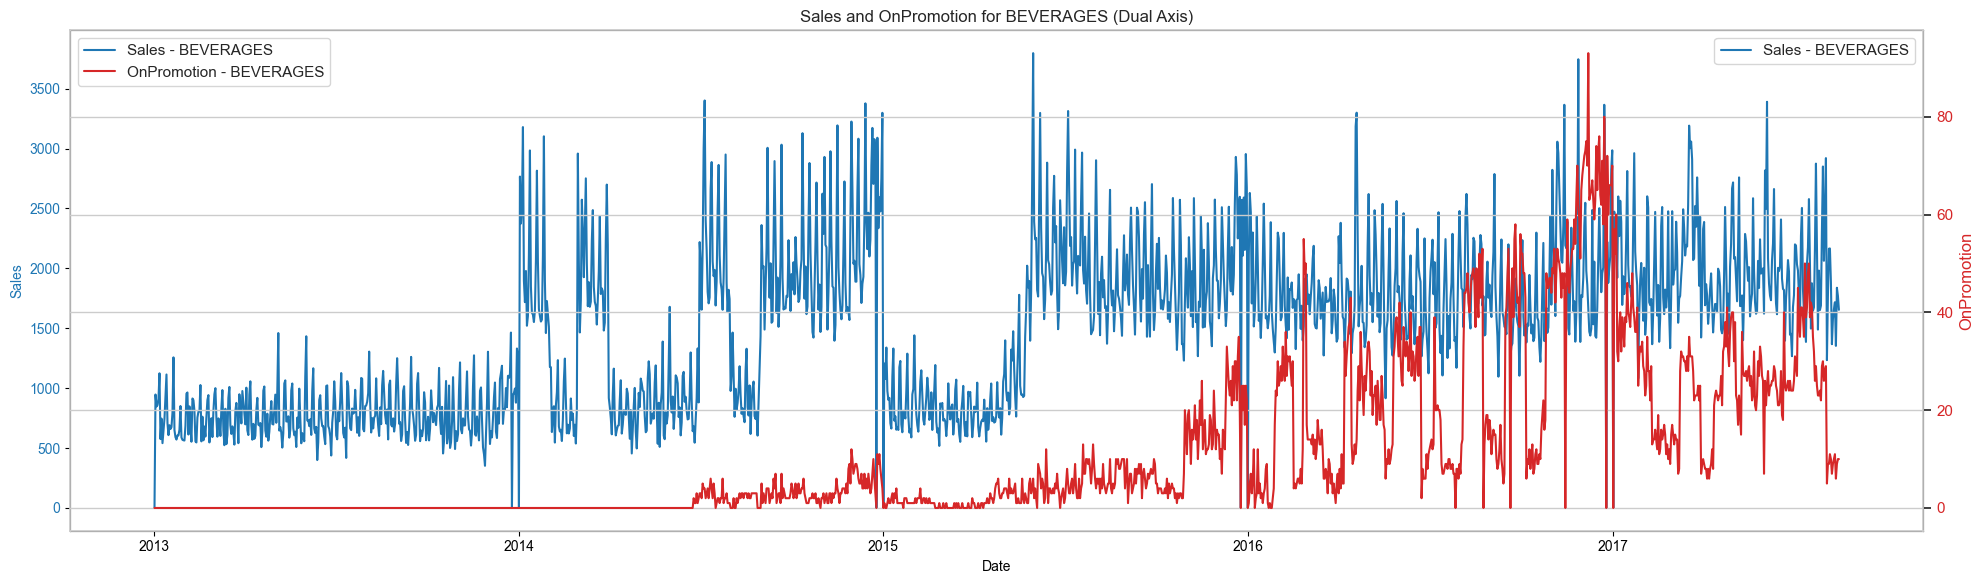

In [42]:
fig, ax1 = plt.subplots(figsize=(20,6))
sns.set(style='whitegrid')

# Plot untuk 'sales' (sumbu Y kiri)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color=color)
sns.lineplot(data=beverages, x='date', y='sales', ax=ax1, color=color, label='Sales - BEVERAGES')
ax1.tick_params(axis='y', labelcolor=color)

# Membuat sumbu Y kedua yang berbagi sumbu X yang sama
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('OnPromotion', color=color) # Label untuk sumbu Y kanan
sns.lineplot(data=beverages, x='date', y='onpromotion', ax=ax2, color=color, label='OnPromotion - BEVERAGES')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales and OnPromotion for BEVERAGES (Dual Axis)')

# Menggabungkan legenda dari kedua sumbu
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.show()

Penjualan BEVERAGES sangat musiman, dengan puncak di pertengahan tahun dan akhir tahun, menunjukkan adanya permintaan yang kuat. Promosi BEVERAGES yang signifikan di Q2 (April - Mei) tampak efektif meningkatkan penjualan di pertengahan tahun, sedangkan lonjakan penjualan di akhir tahun lebih banyak dipengaruhi oleh musim liburan umum, bukan karena promosi spesifik untuk BEVERAGES.

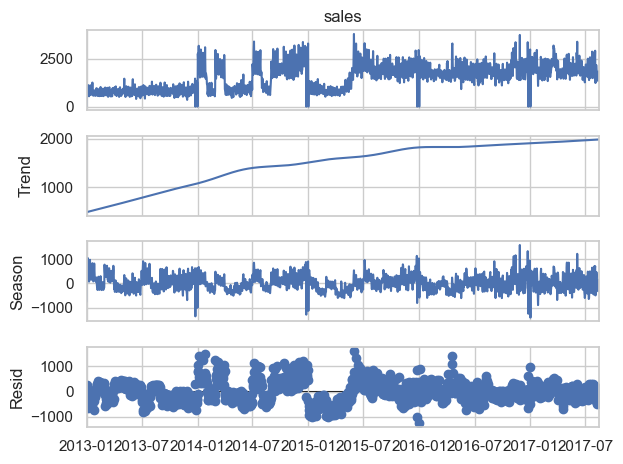

In [43]:
from statsmodels.tsa.seasonal import STL

decompose = STL(beverages['sales'], period = 365).fit()
decompose.plot()
plt.show()

Eliminating Seasonality from Beverage Sales"

In [44]:
beverages['sales_sa'] = beverages['sales'] - decompose.seasonal
beverages

,id,family,sales,onpromotion,dcoilwtico,weekdays,week_of_the_year,year,month,day,isWeekend,isHoliday,oil_fill,sales_sa
date,,,,,,,,,,,,,,
2013-01-01,1455,BEVERAGES,0.0,0,NaN,Tuesday,1,2013,1,1,0,1,93.140000,753.867511
2013-01-02,3237,BEVERAGES,947.0,0,93.14,Wednesday,1,2013,1,2,0,0,93.140000,-82.105789
2013-01-03,5019,BEVERAGES,847.0,0,92.97,Thursday,1,2013,1,3,0,0,92.970000,249.015713
2013-01-04,6801,BEVERAGES,859.0,0,93.12,Friday,1,2013,1,4,0,0,93.120000,160.511072
2013-01-05,8583,BEVERAGES,912.0,0,NaN,Saturday,1,2013,1,5,1,0,93.146667,-138.688858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993433,BEVERAGES,1717.0,11,48.81,Friday,32,2017,8,11,0,0,48.810000,1936.557228
2017-08-12,2995215,BEVERAGES,1353.0,6,NaN,Saturday,32,2017,8,12,1,0,48.403333,1675.395024
2017-08-13,2996997,BEVERAGES,1838.0,9,NaN,Sunday,32,2017,8,13,1,0,47.996667,1804.741099


Analysis of Seasonal Adjustment Effects on Beverage Sales

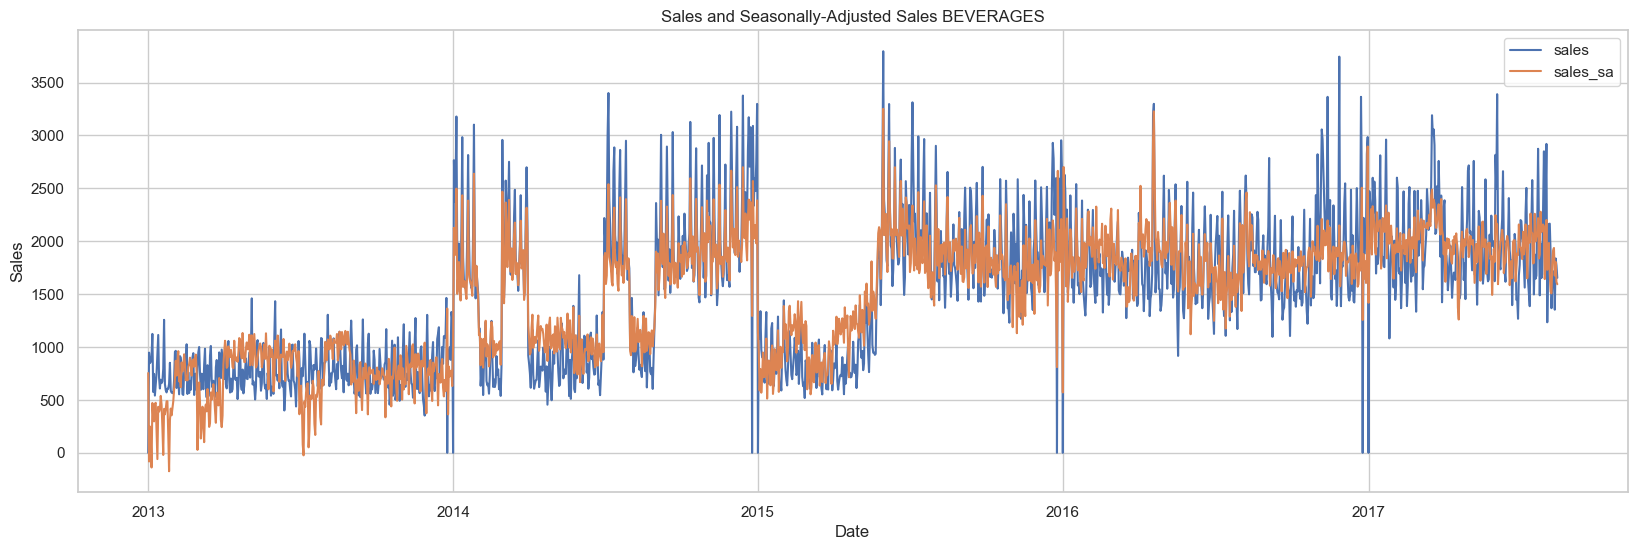

In [45]:
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')
sns.lineplot(data=beverages, x='date', y='sales', label='sales')
sns.lineplot(data=beverages, x='date', y='sales_sa', label='sales_sa')
plt.title('Sales and Seasonally-Adjusted Sales BEVERAGES')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

Penjualan BEVERAGES memiliki komponen musiman yang kuat, dan dengan menghilangkannya terlihat tren penjualan yang lebih stabil dan mendasar.

Check Stationerity

In [46]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(beverages['sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.927146
p-value: 0.001844


Data dianggap stasioner karena p-value berada di bawah 0.05

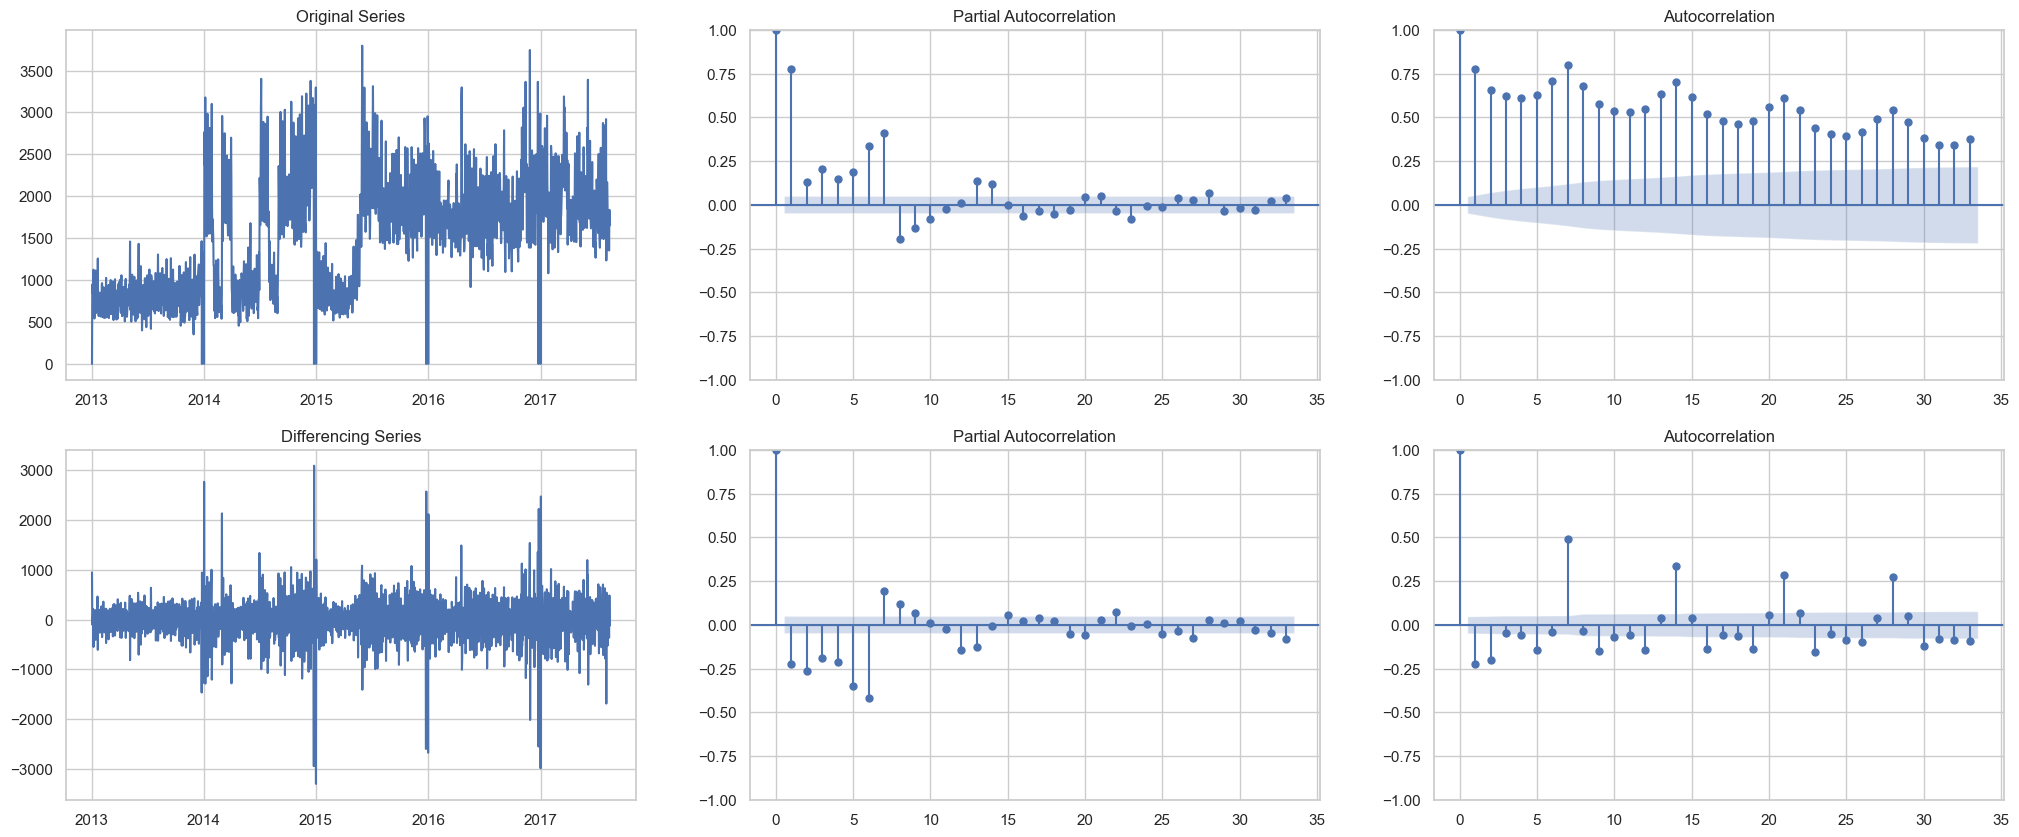

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(beverages['sales'])
ax[0, 1] = plot_pacf(beverages['sales'], ax=ax[0, 1])
ax[0, 2] = plot_acf(beverages['sales'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(beverages['sales'].diff().dropna())
ax[1, 1] = plot_pacf(beverages['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(beverages['sales'].diff().dropna(), ax=ax[1, 2])

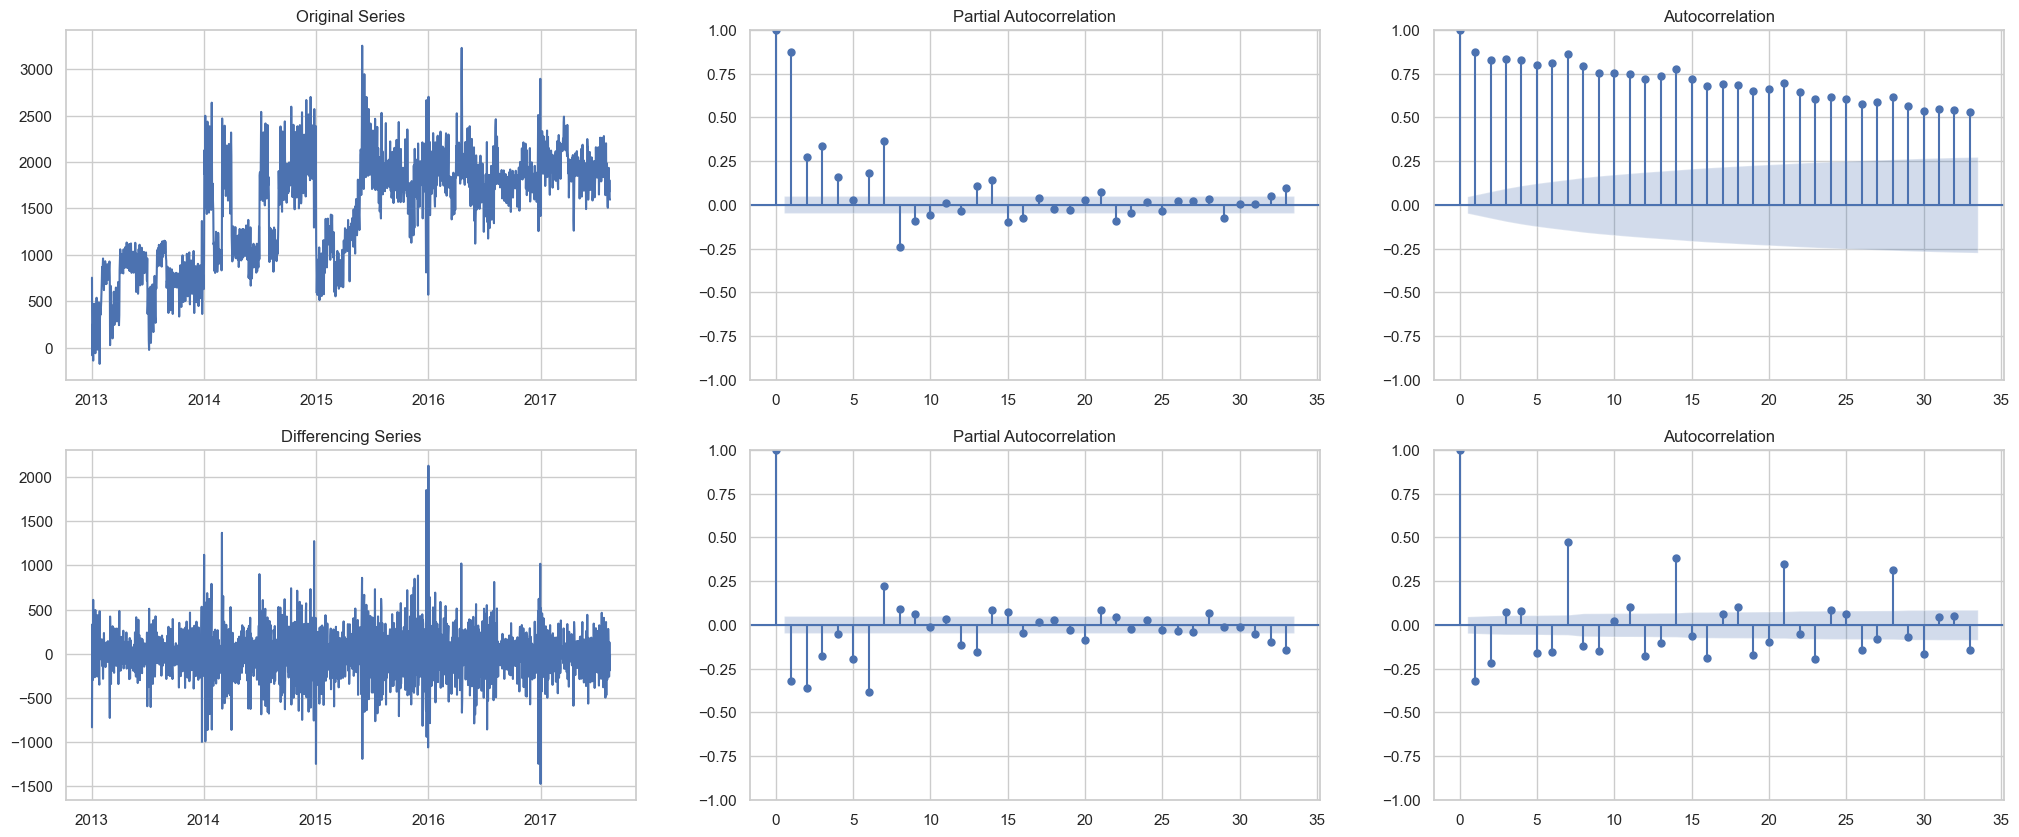

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(beverages['sales_sa'])
ax[0, 1] = plot_pacf(beverages['sales_sa'], ax=ax[0, 1])
ax[0, 2] = plot_acf(beverages['sales_sa'], ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(beverages['sales_sa'].diff().dropna())
ax[1, 1] = plot_pacf(beverages['sales_sa'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(beverages['sales_sa'].diff().dropna(), ax=ax[1, 2])

plt.show()


array([[<Axes: title={'center': 'sales'}>]], dtype=object)

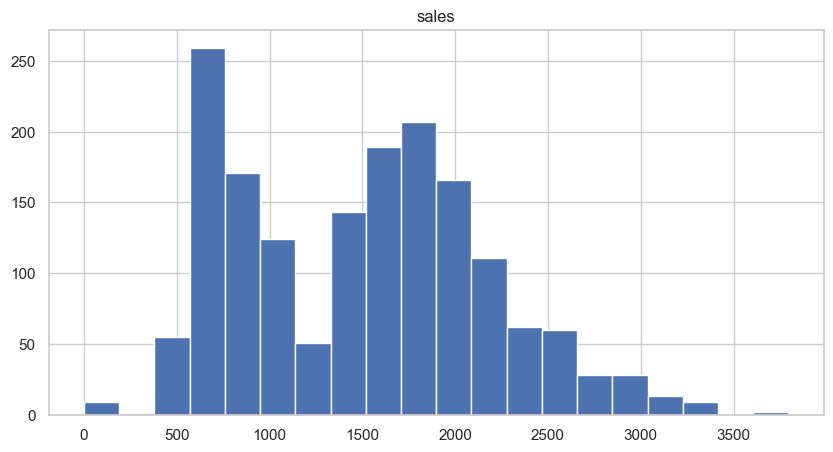

In [49]:
beverages.hist('sales', figsize=(10, 5), bins=20)

In [50]:
beverages['dcoilwtico'] = beverages['dcoilwtico'].fillna(method='bfill')
beverages['dcoilwtico_diff'] = beverages['dcoilwtico'].diff().fillna(method='bfill')
beverages

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24236\2250913005.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beverages['dcoilwtico'] = beverages['dcoilwtico'].fillna(method='bfill')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24236\2250913005.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  beverages['dcoilwtico_diff'] = beverages['dcoilwtico'].diff().fillna(method='bfill')


,id,family,sales,onpromotion,dcoilwtico,weekdays,week_of_the_year,year,month,day,isWeekend,isHoliday,oil_fill,sales_sa,dcoilwtico_diff
date,,,,,,,,,,,,,,,
2013-01-01,1455,BEVERAGES,0.0,0,93.14,Tuesday,1,2013,1,1,0,1,93.140000,753.867511,0.00
2013-01-02,3237,BEVERAGES,947.0,0,93.14,Wednesday,1,2013,1,2,0,0,93.140000,-82.105789,0.00
2013-01-03,5019,BEVERAGES,847.0,0,92.97,Thursday,1,2013,1,3,0,0,92.970000,249.015713,-0.17
2013-01-04,6801,BEVERAGES,859.0,0,93.12,Friday,1,2013,1,4,0,0,93.120000,160.511072,0.15
2013-01-05,8583,BEVERAGES,912.0,0,93.20,Saturday,1,2013,1,5,1,0,93.146667,-138.688858,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993433,BEVERAGES,1717.0,11,48.81,Friday,32,2017,8,11,0,0,48.810000,1936.557228,0.27
2017-08-12,2995215,BEVERAGES,1353.0,6,47.59,Saturday,32,2017,8,12,1,0,48.403333,1675.395024,-1.22
2017-08-13,2996997,BEVERAGES,1838.0,9,47.59,Sunday,32,2017,8,13,1,0,47.996667,1804.741099,0.00


In [51]:
beverages.isnull().sum()

id                  0
family              0
sales               0
onpromotion         0
dcoilwtico          0
weekdays            0
week_of_the_year    0
year                0
month               0
day                 0
isWeekend           0
isHoliday           0
oil_fill            0
sales_sa            0
dcoilwtico_diff     0
dtype: int64

Menghitung MA Penjualan BEVERAGES

In [52]:
beverages['sales_mean_7'] = beverages['sales'].rolling(window=7).mean() #siklus mingguan
beverages['sales_mean_30'] = beverages['sales'].rolling(window=30).mean() #siklus bulanan
beverages

,id,family,sales,onpromotion,dcoilwtico,weekdays,week_of_the_year,year,month,day,isWeekend,isHoliday,oil_fill,sales_sa,dcoilwtico_diff,sales_mean_7,sales_mean_30
date,,,,,,,,,,,,,,,,,
2013-01-01,1455,BEVERAGES,0.0,0,93.14,Tuesday,1,2013,1,1,0,1,93.140000,753.867511,0.00,NaN,NaN
2013-01-02,3237,BEVERAGES,947.0,0,93.14,Wednesday,1,2013,1,2,0,0,93.140000,-82.105789,0.00,NaN,NaN
2013-01-03,5019,BEVERAGES,847.0,0,92.97,Thursday,1,2013,1,3,0,0,92.970000,249.015713,-0.17,NaN,NaN
2013-01-04,6801,BEVERAGES,859.0,0,93.12,Friday,1,2013,1,4,0,0,93.120000,160.511072,0.15,NaN,NaN
2013-01-05,8583,BEVERAGES,912.0,0,93.20,Saturday,1,2013,1,5,1,0,93.146667,-138.688858,0.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,2993433,BEVERAGES,1717.0,11,48.81,Friday,32,2017,8,11,0,0,48.810000,1936.557228,0.27,1790.142857,1967.333333
2017-08-12,2995215,BEVERAGES,1353.0,6,47.59,Saturday,32,2017,8,12,1,0,48.403333,1675.395024,-1.22,1674.285714,1966.233333
2017-08-13,2996997,BEVERAGES,1838.0,9,47.59,Sunday,32,2017,8,13,1,0,47.996667,1804.741099,0.00,1627.428571,1959.666667


In [53]:
train = beverages[:-30] #ambil semua baris mulai dari baris paling awal hingga 30 baris terakhir
test = beverages[-30:] #ambil 30 baris terakhir dari df
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (1658, 17)
Test shape: (30, 17)


In [54]:
trainArima = beverages['sales'][:len(beverages)-30] #effectively mengambil 1658 data penjualan pertama (jlh data keseluruhan - 30)
testArima = beverages['sales'][len(beverages)-30:] #effectively menggambil 30 data terakhir


## Modeling

ARIMA

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(trainArima, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1658
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -12314.156
Date:                Fri, 30 May 2025   AIC                          24636.311
Time:                        17:30:33   BIC                          24657.965
Sample:                    01-01-2013   HQIC                         24644.338
                         - 07-16-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1493.5686    143.250     10.426      0.000    1212.804    1774.333
ar.L1          0.9820      0.005    185.928      0.000       0.972       0.992
ma.L1         -0.7301      0.015    -48.764      0.0

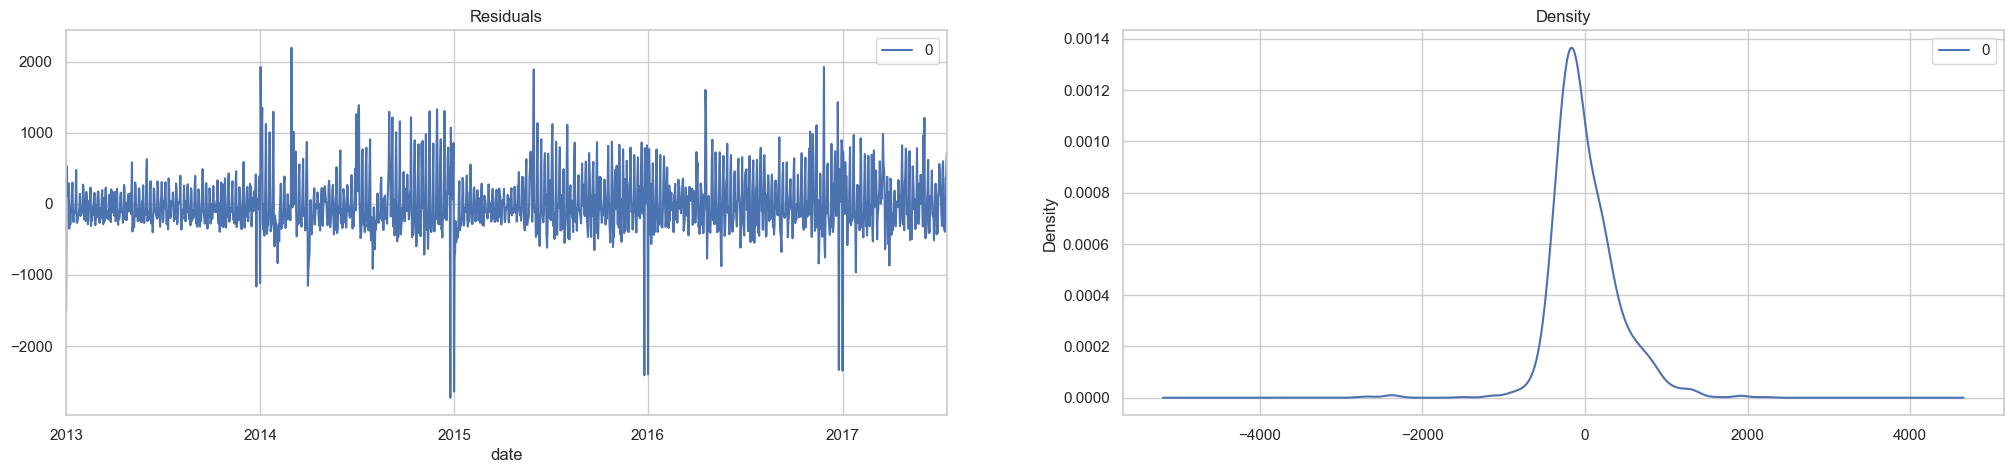

In [56]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


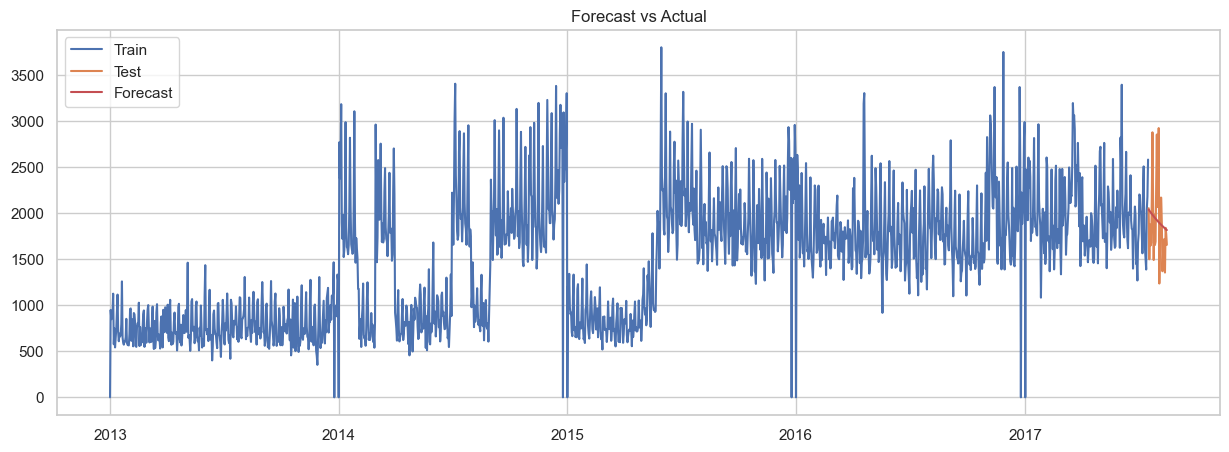

In [57]:
# Predict data
forecast = model_fit.predict(start=len(trainArima), end=len(trainArima)+len(testArima)-1, typ='levels')
# forecast.index = trainArima.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(trainArima, label='Train')
plt.plot(testArima, label='Test')
plt.plot(forecast, label='Forecast', color='r')
plt.legend()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
mae = mean_absolute_error(testArima, forecast)
rmse = mean_squared_error(testArima, forecast, squared=False)
mape = mean_absolute_percentage_error(testArima, forecast)


print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 326.52
RMSE: 421.49
MAPE: 0.17%


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LSTM

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
ind_scaler = MinMaxScaler() #independent variable
sales_scaler = MinMaxScaler() #dependent variable
x = beverages[['onpromotion', 'dcoilwtico']].copy()
y = beverages['sales'].copy()

x['dcoilwtico'] = ind_scaler.fit_transform(x['dcoilwtico'].values.reshape(-1, 1))
x['onpromotion'] = ind_scaler.fit_transform(x['onpromotion'].values.reshape(-1, 1))
y = sales_scaler.fit_transform(y.values.reshape(-1, 1))

In [70]:
x

,onpromotion,dcoilwtico
date,,
2013-01-01,0.000000,0.792965
2013-01-02,0.000000,0.792965
2013-01-03,0.000000,0.790951
2013-01-04,0.000000,0.792728
2013-01-05,0.000000,0.793675
...,...,...
2017-08-11,0.118280,0.267914
2017-08-12,0.064516,0.253464
2017-08-13,0.096774,0.253464


In [71]:
def load_data(X, seq_len, test_size=30): #utk dataset yg diuji adalah 30 row, artinya memprediksi 30 hari ke depan
    amount_of_features = X.shape[1]  # 1. Menghitung jumlah fitur (kolom) dalam data input X
    X_mat = X.values                 # 2. Mengubah DataFrame X menjadi array NumPy
    sequence_length = seq_len + 1    # 3. Panjang total setiap potongan data (input + target)
    data = []                        # 4. List kosong untuk menyimpan semua potongan data

    # 5. Loop untuk membuat potongan-potongan data urutan
    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)             # 6. Mengubah list 'data' menjadi array NumPy
    train_data = data[:-test_size]    # 7. Memisahkan data latih (semua kecuali 'test_size' terakhir)

    # 8. Memisahkan fitur input (x_train) dan target output (y_train) untuk data latih
    x_train = train_data[:, :-1]      # Semua baris, semua kolom kecuali kolom terakhir di setiap langkah waktu
    y_train = train_data[:, -1][:,-1] # Semua baris, langkah waktu terakhir, dan fitur terakhir (diasumsikan target)

    # 9. Memisahkan fitur input (x_test) dan target output (y_test) untuk data uji
    x_test = data[-test_size:, :-1]   # 'test_size' baris terakhir, semua kolom kecuali kolom terakhir
    y_test = data[-test_size:, -1][:,-1]# 'test_size' baris terakhir, langkah waktu terakhir, fitur terakhir

    # 10. Mengubah bentuk x_train dan x_test menjadi 3D (sampel, langkah waktu, fitur) - penting untuk LSTM
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

window = 7  # Ini akan menjadi 'seq_len'
x['sales'] = y # 'x' awalnya berisi 'onpromotion' & 'dcoilwtico'. 'y' berisi 'sales' (sudah di-scale).
              # Baris ini menambahkan 'sales' yang sudah di-scale ke DataFrame 'x'.
              # Jadi, 'x' sekarang memiliki 3 fitur: 'onpromotion', 'dcoilwtico', dan 'sales'.

# Memanggil fungsi load_data
X_train, y_train, X_test, y_test = load_data(x, window, test_size=30)

# Mencetak bentuk (dimensi) dari data yang dihasilkan
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1650, 7, 3) (1650,) (30, 7, 3) (30,)


Data penjualan minuman telah berhasil diubah menjadi format urutan (sekuens) yang siap untuk dilatihkan pada model prediksi LSTM. Dengan memiliki 1650 urutan data historis untuk melatih model (masing-masing urutan terdiri dari 7 langkah waktu dengan 3 fitur), dan 30 urutan data terakhir disisihkan untuk menguji performa model tersebut.

In [72]:
print("Kolom beverages:", beverages.columns)
print("Indeks beverages:", beverages.index)
print(beverages.head())

Kolom beverages: Index(['id', 'family', 'sales', 'onpromotion', 'dcoilwtico', 'weekdays',
       'week_of_the_year', 'year', 'month', 'day', 'isWeekend', 'isHoliday',
       'oil_fill', 'sales_sa', 'dcoilwtico_diff', 'sales_mean_7',
       'sales_mean_30'],
      dtype='object')
Indeks beverages: DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1688, freq=None)
              id     family  sales  onpromotion  dcoilwtico   weekdays  \
date                                                                     
2013-01-01  1455  BEVERAGES    0.0            0       93.14    Tuesday   
2013-01-02  323

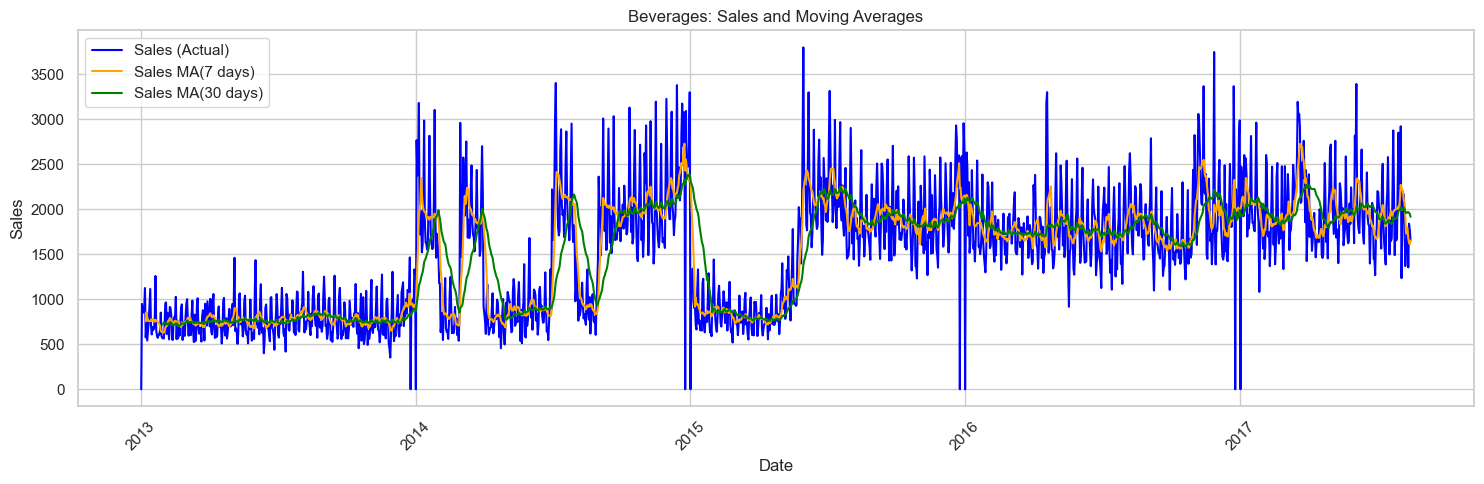

In [73]:
plt.figure(figsize=(15, 5)) # Anda bisa sesuaikan ukurannya, misal (20,6)
# Menggunakan beverages.index sebagai sumbu X
plt.plot(beverages.index, beverages['sales'], color='blue', label='Sales (Actual)')
plt.plot(beverages.index, beverages['sales_mean_7'], color='orange', label='Sales MA(7 days)')
plt.plot(beverages.index, beverages['sales_mean_30'], color='green', label='Sales MA(30 days)')
plt.title('Beverages: Sales and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# Import keras lstm model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [91]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(units=64, input_shape=(window, 3), return_sequences=True))
# units=64 : menentukan jumlah unit (atau neuron) dalam layer LSTM ini.
# Jumlah unit ini adalah salah satu hyperparameter(penentuannya tidak ada rumus pasti, namun dengan eksperimetasi (16,32,64)) yang bisa di tuning

# input_shape=(window, 3) : mendefinisikan bentuk input yang diharapkan oleh layer LSTM pertama.
# window: Ini adalah variabel yang merepresentasikan jumlah langkah waktu (time steps) dalam setiap sekuens input.
# 3: Ini adalah jumlah fitur pada setiap langkah waktu. Artinya, untuk setiap titik waktu dalam sekuens window, ada 3 nilai fitur yang berbeda.
# 3 fitur tsb adalah onpromotion, dcoilwtico, dan sales


#layer LSTM kedua, tidak membutuhkan input_shape karna diambil otomatis dari previous output layer
modelLSTM.add(LSTM(units=16))

#layer Dropout
modelLSTM.add(Dropout(0.2))
# Dropout adalah teknik regularisasi yang membantu mencegah overfitting.
# 0.2 artinya 20% dari unit input selama proses pelatihan ke layer ini akan dinonaktifkan (di-set menjadi nol) secara acak pada setiap iterasi pembaruan bobot

#layer Dense, layer output untuk tugas regresi
modelLSTM.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
#units=1 artinya memprediksi satu nilai tunggal, yaitu nilai sales
#activation=linear adalah fungsi aktivasi menentukan bagaimana output dari layer dihitung berdasarkan inputnya


earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [earlystop]

modelLSTM.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 7, 64)          │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,609 (88.32 KB)

 Trainable params: 22,609 (88.32 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
from keras.callbacks import ModelCheckpoint

In [77]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError

In [79]:
# menyiapkan sebuah mekanisme (cp) untuk secara otomatis menyimpan versi terbaik dari model selama training
cp = ModelCheckpoint('modelLSTM/model_terbaik.keras', save_best_only=True)
modelLSTM.compile(optimizer='adam', loss='mse', metrics = [RootMeanSquaredError()])

In [80]:
import time

In [81]:
#fitting to the training set
start = time.time()
history1=modelLSTM.fit(X_train,y_train,epochs=100,batch_size=32, validation_split=0.05, verbose=1, callbacks=callbacks_list)
print ('compilation time : ', time.time() - start)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1303 - root_mean_squared_error: 0.3576 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1642
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245 - root_mean_squared_error: 0.1562 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0998
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.1202 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.1214 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0946
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0931
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.1175 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0941
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [ ]:
trainPredict = modelLSTM.predict(X_train)
testPredict = modelLSTM.predict(X_test)

trainPredict = sales_scaler.inverse_transform(trainPredict)
trainY = sales_scaler.inverse_transform([y_train])
testPredict = sales_scaler.inverse_transform(testPredict)
testY = sales_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(30, 1)
 #mengubah bentuk menjadi array dengan 30 baris dan 1 kolom
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(30, 1)
print(plot_actual.shape)
print(plot_predicted.shape)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(30, 1)
(30, 1)


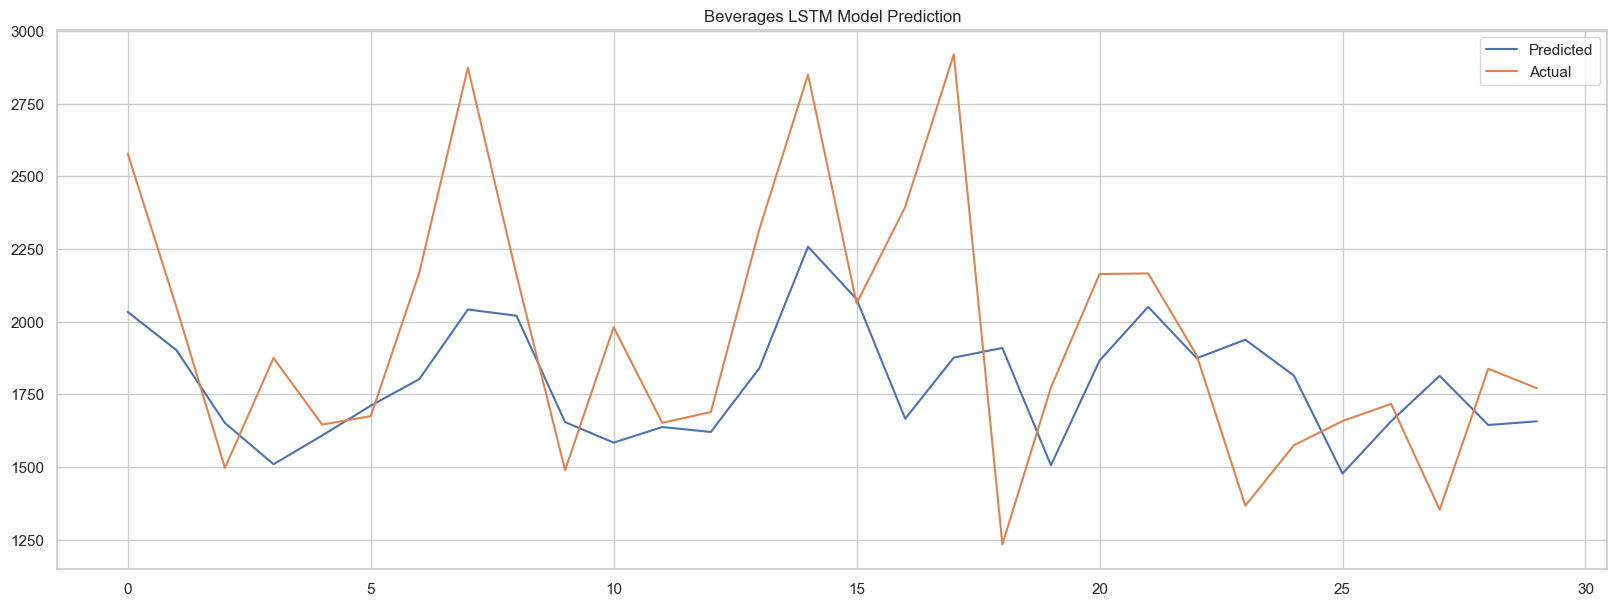

In [83]:
plt.figure(figsize=(20,7))
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.title('Beverages LSTM Model Prediction')
plt.legend(loc='best')
plt.show()

In [84]:
# Input into pandas dataframe, test as index and plot_predicted as the column
# Reshape the data plot_predicted
plot_predicted = plot_predicted.reshape(30,)

forecastLSTM = pd.DataFrame({'test': test['sales'], 'forecast': plot_predicted}, index=test.index)
forecastLSTM

,test,forecast
date,,
2017-07-17,2051.0,2033.626099
2017-07-18,1497.0,1902.337891
2017-07-19,1875.0,1651.345459
2017-07-20,1646.0,1509.430420
2017-07-21,1675.0,1608.437256
2017-07-22,2169.0,1710.872070
2017-07-23,2874.0,1802.348267
2017-07-24,2161.0,2041.992676
2017-07-25,1489.0,2020.458740


In [85]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))

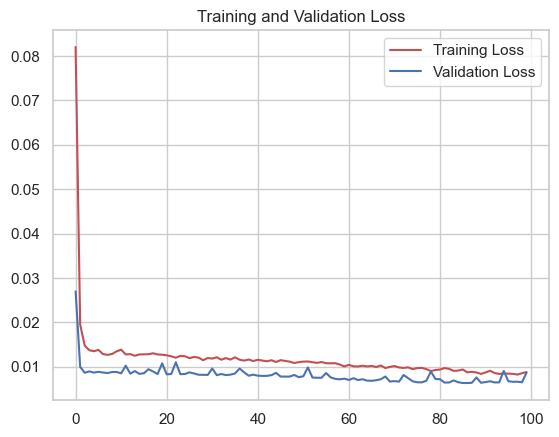

<Figure size 640x480 with 0 Axes>

In [86]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [87]:
y_pred = modelLSTM.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Evaluasi Model

In [89]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 0.011629045755484974
RMSE: 0.10783805337395967
MAE: 0.08177724160204278
